In [162]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [163]:
# READING
train = pd.read_csv("D:/R/House Prices kaggle/train.csv")
test = pd.read_csv("D:/R/House Prices kaggle/test.csv")

In [164]:
# BINDING
master=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,master.shape)
master.head()

(1460, 81) (1459, 80) (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [165]:
### Chck Dtypes
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [166]:
# Check column names
print(master.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [167]:
# check na
sn=master.isnull().sum()/len(master)*100
sn=pd.DataFrame(sn)
sn.head(50)

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517


In [168]:
# CHECK UNIQUE VALUES

master.apply(lambda x : len(x.unique()))

Id               2919
MSSubClass         16
MSZoning            6
LotFrontage       129
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType           10
SaleCondition       6
SalePrice         664
Length: 81, dtype: int64

In [169]:
## SEPEARTION CATEGORY VS NUMERIC

cat=['MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC','MSSubClass',
       'Fence', 'MiscFeature','SaleType','SaleCondition','OverallQual', 'OverallCond','GarageCars']


num=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath','1stFlrSF', '2ndFlrSF','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice']



final=master[num+cat]


In [170]:
### VALUE COUNTS MULTIPLE COLUMN##
for i in master.columns:
    x=master[i].value_counts()
    print("Column name is:",i,"and it value is:",x)

Column name is: Id and it value is: 2047    1
1088    1
1084    1
1082    1
1080    1
       ..
2532    1
483     1
2530    1
481     1
2049    1
Name: Id, Length: 2919, dtype: int64
Column name is: MSSubClass and it value is: 20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
Column name is: MSZoning and it value is: RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Column name is: LotFrontage and it value is: 60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64
Column name is: LotArea and it value is: 9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292

In [171]:
# DEALING WITH IMPUTAION CHECKPOINTS
tu={'MasVnrArea','GarageArea','LotFrontage','GarageYrBlt','GarageCars','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF'}
for d in tu:
    y=master[d].describe()
    print(y)
    

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
count    2917.000000
mean        0.429894
std         0.524736
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: 

In [172]:
#MSVNR MISSING
dd=master[master['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]
dd


,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [173]:
# LOT MISSING
sd=master[master['LotFrontage'].isnull()][['LotFrontage','LotArea','LotShape']]
sd


,LotFrontage,LotArea,LotShape
7,NaN,10382,IR1
12,NaN,12968,IR2
14,NaN,10920,IR1
16,NaN,11241,IR1
24,NaN,8246,IR1
...,...,...,...
2847,NaN,11088,Reg
2850,NaN,21533,IR2
2900,NaN,50102,IR1
2901,NaN,8098,IR1


In [174]:
# BSMT missing
sd=master[master['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
sd

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2803,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2824,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2891,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [175]:
##CHECK GARAGES MISSING###

sy=master[master['GarageYrBlt'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
sy

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2893,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2909,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2913,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2914,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [176]:

master.MasVnrArea.value_counts()


0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

# MISSING VALUE TREATMENT#

In [177]:

                  ### GIVEN IN DATA DICTIONRAY THAT NA MEANS None FOR SOME VARIABLES
                  ## IMPUTE 2-3 NA WITH mode i.e For some Categorical Variables##
                  ### IMPUTE 4-5 NA i.e Numeric some with mean some with median
### IMPUTE GARAGE BUILD 0 As all are garage variable are no and zero so imput garge yr built 0 means not built###
## IMPUTE LOT FRONTAGE WITH RESPECT TO ITS NEIGHBOURHOOD as since area of each street connected to....
##                                         house property likely have same area with respect to its neigbour

#1.MSVNR AND MIS FEATURE.....

ln={'MiscFeature','MasVnrType','Alley','PoolQC','Fence'}
for i in ln:
    master[i].fillna('None',inplace=True)
    
#DEFINING DEICTIONARIES 
Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
Grg = ['GarageType','GarageFinish','GarageQual','GarageCond']

#2.BSMTS
for col in Bsmt:
    master[col].fillna('No_Bsmt',inplace=True)
    
#3.GRGES    
for col in Grg:
    master[col].fillna('No_Grg',inplace=True)    
    

#4.FIRE PLACES
master['FireplaceQu'] = master['FireplaceQu'].fillna('NotAvailable')

#5.IMPUTE WITH MEDIAN or 0  DUE TO 1-3 NA IN EACH VARIABLRS AS THESE ARE IN CATEGORIES 

tt={'BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF'}
for c in tt:
    master[c] = master[c].fillna(0)

    
    
#6.IMPUTE WITH MODE WHICH LEADS TO HIGH FREQUENCY VARIABLES 

ts={'Exterior1st','Exterior2nd','KitchenQual','Functional','MSZoning','Utilities','Electrical','SaleType','MSZoning'}
for i in ts:
    master[i].fillna(master[i].mode,inplace=True)
 
       
#9.MSVNR AREA # DUE TO 0 MEAN AND 0 MEDIAN
master.MasVnrArea = master.MasVnrArea.fillna(0)

    
#11.GarageYrBlt    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    master[col] = master[col].fillna(0)

#12.LOT FRONTAGE

master["LotFrontage"] = master.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# EDA#

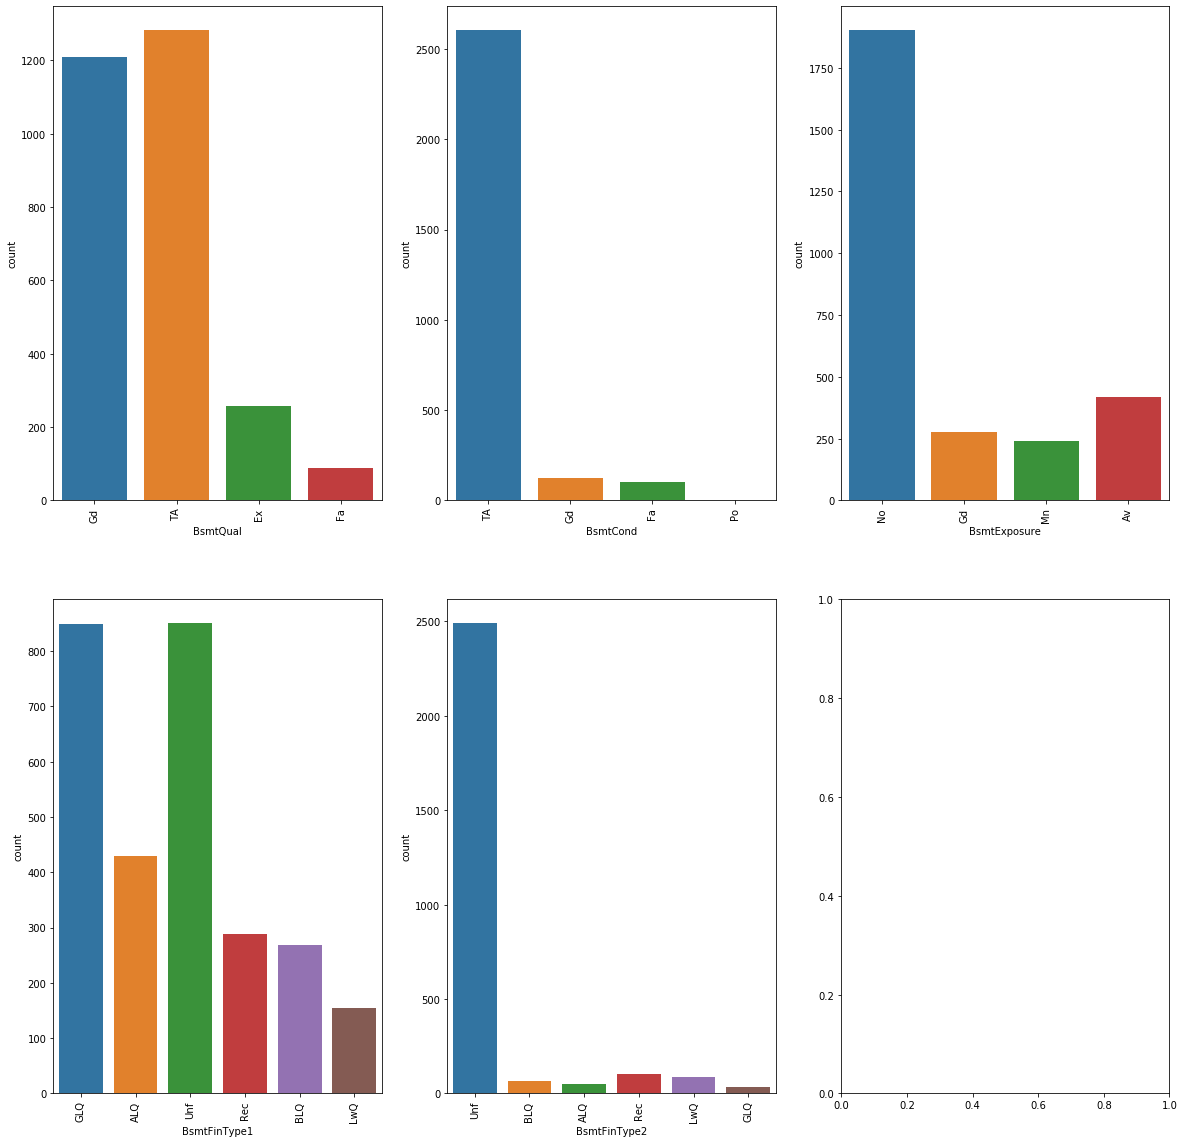

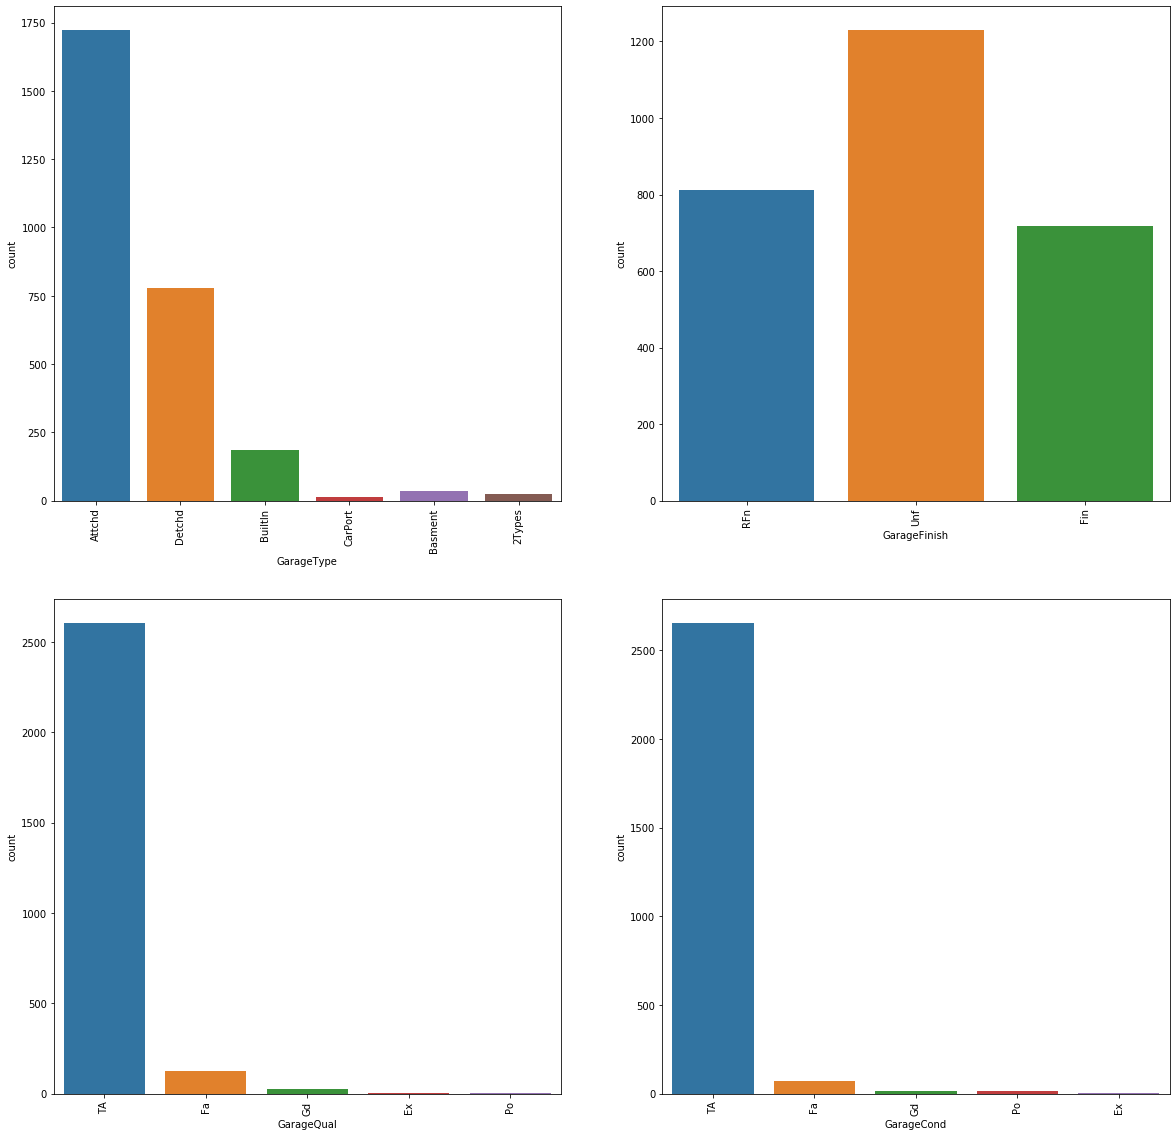

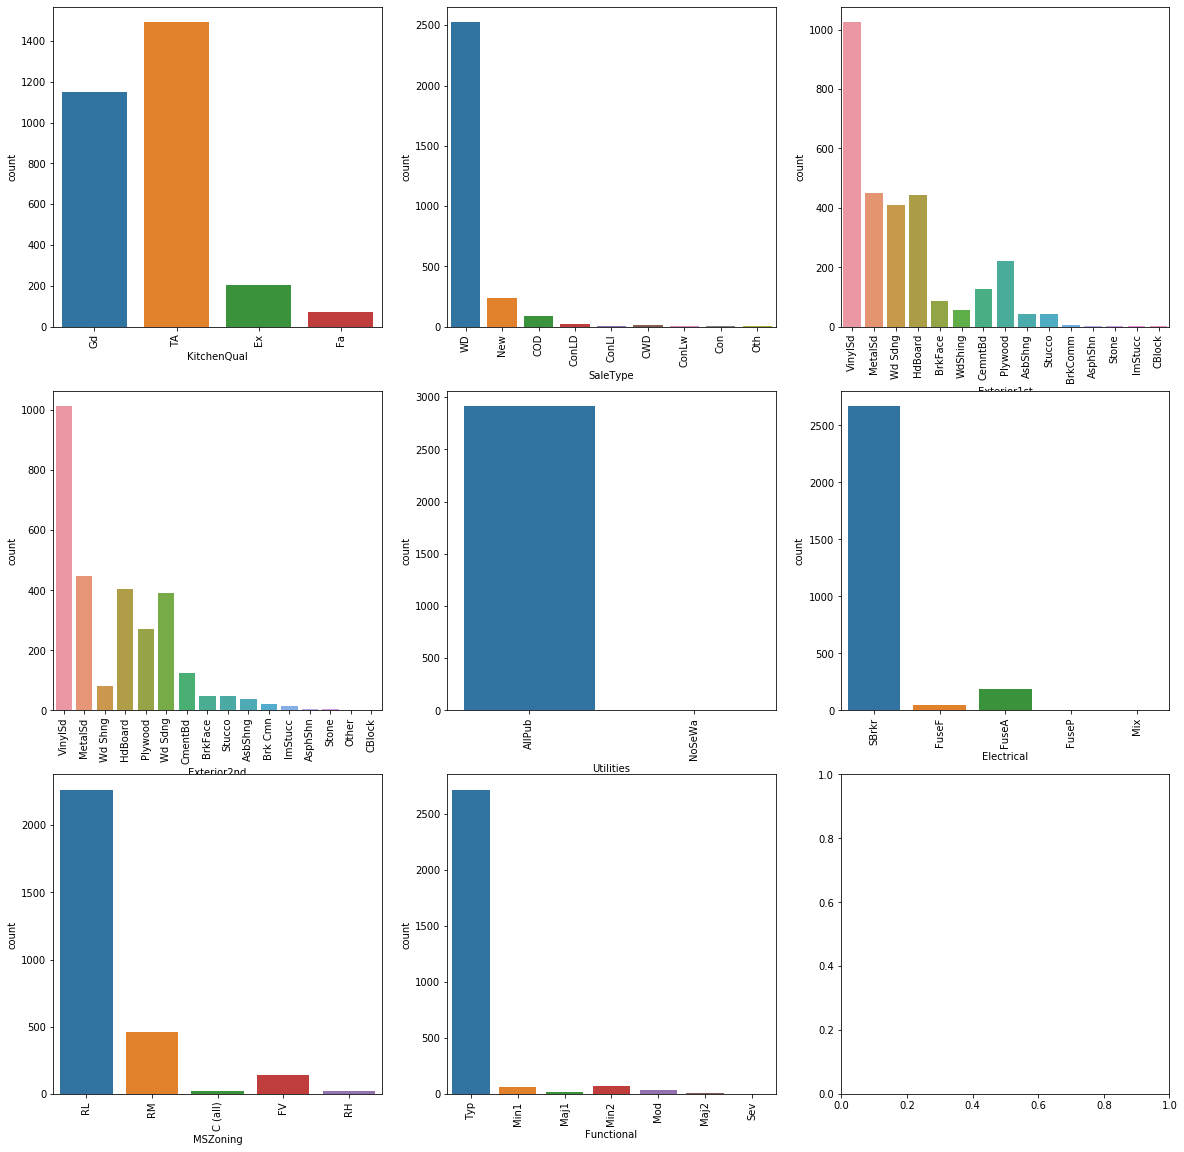

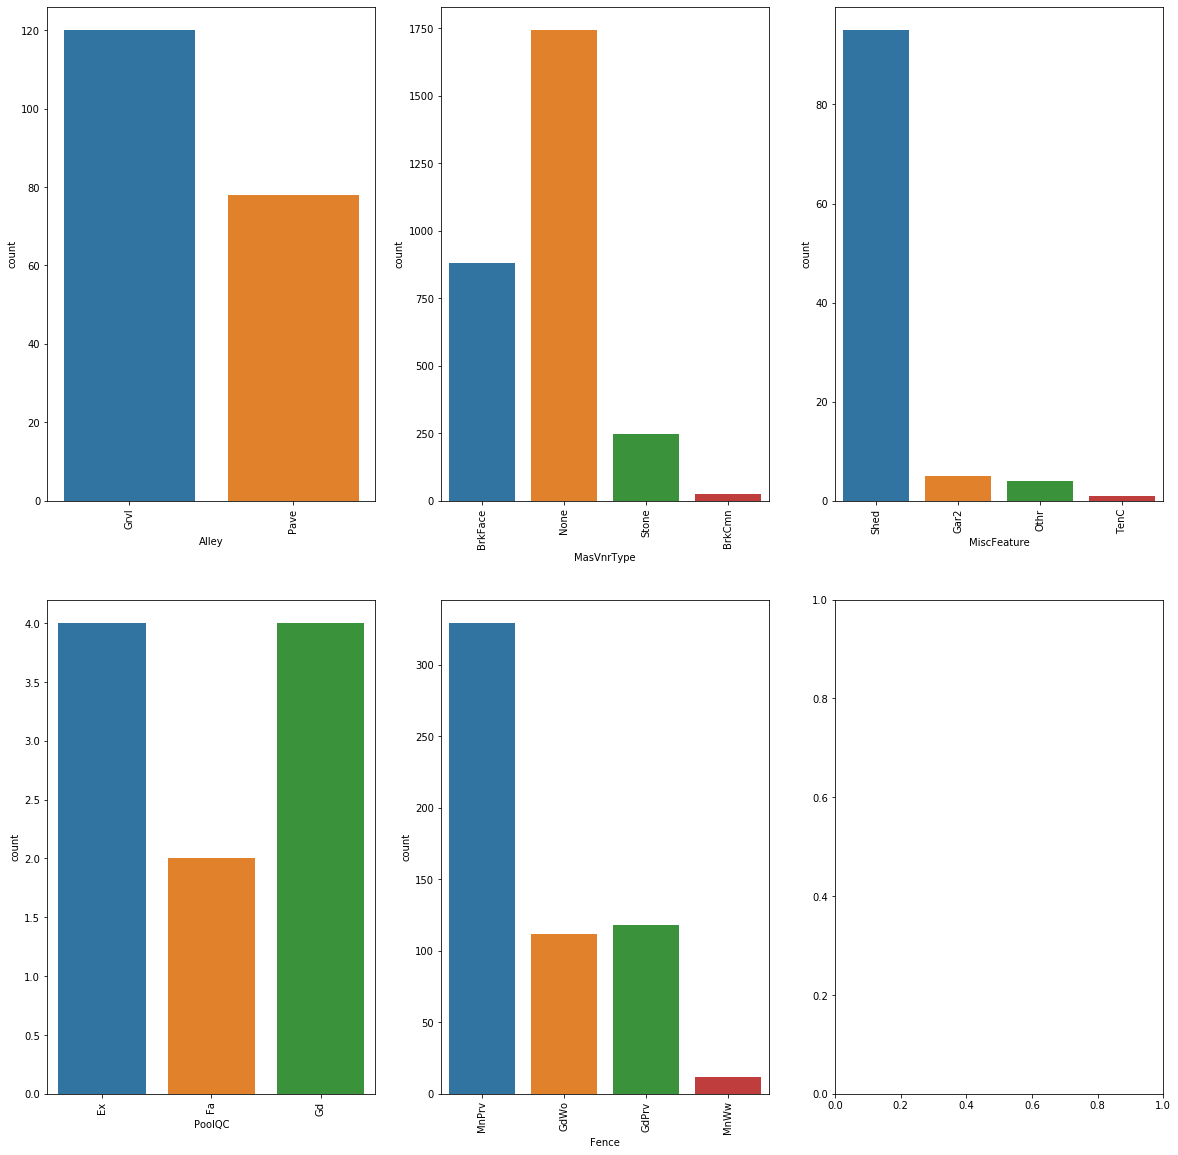

In [178]:

## Categorical Variables

fig, ax=plt.subplots(2,3,figsize=(20,20))
for variable,subplot in zip(Bsmt,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
fig, ax=plt.subplots(2,2,figsize=(20,20))
for variable,subplot in zip(Grg,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 
        
        
        
fig, ax=plt.subplots(3,3,figsize=(20,20))
for variable,subplot in zip(ts,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 
        
        
        
        


fig, ax=plt.subplots(2,3,figsize=(20,20))
for variable,subplot in zip(ln,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

SalePrice in Thousands ('000)

--------------------GarageType  vs  SalePrice--------------------


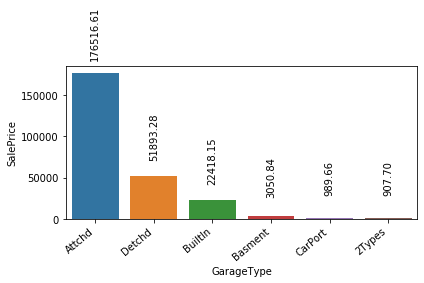


Maximum Sales : 
             SalePrice
GarageType            
Attchd      176516.611

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------GarageFinish  vs  SalePrice--------------------


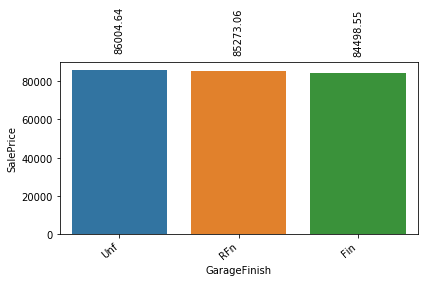


Maximum Sales : 
              SalePrice
GarageFinish           
Unf           86004.636

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------GarageQual  vs  SalePrice--------------------


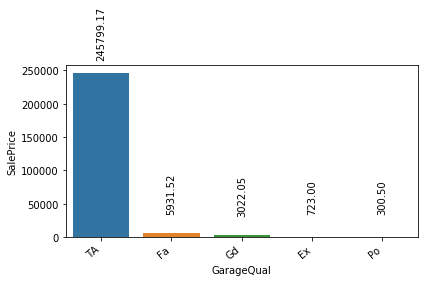


Maximum Sales : 
             SalePrice
GarageQual            
TA          245799.175

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------GarageCond  vs  SalePrice--------------------


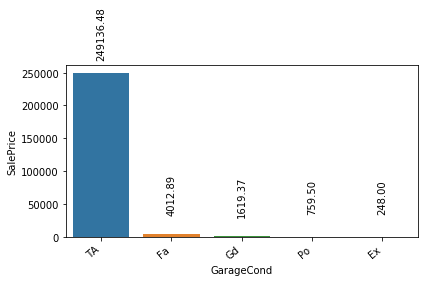


Maximum Sales : 
             SalePrice
GarageCond            
TA          249136.485

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtQual  vs  SalePrice--------------------


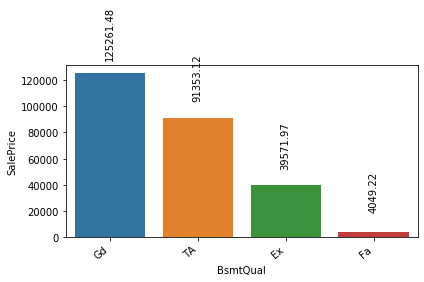


Maximum Sales : 
          SalePrice
BsmtQual           
Gd        125261.48

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtCond  vs  SalePrice--------------------


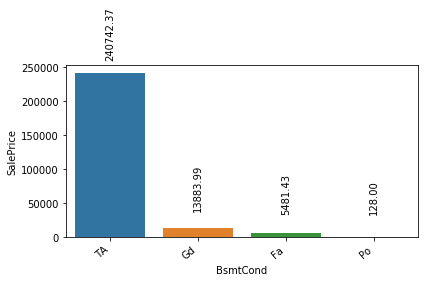


Maximum Sales : 
           SalePrice
BsmtCond            
TA        240742.366

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtExposure  vs  SalePrice--------------------


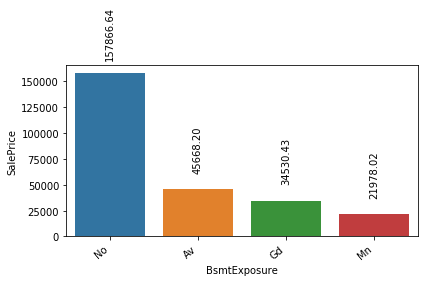


Maximum Sales : 
               SalePrice
BsmtExposure            
No            157866.638

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtFinType1  vs  SalePrice--------------------


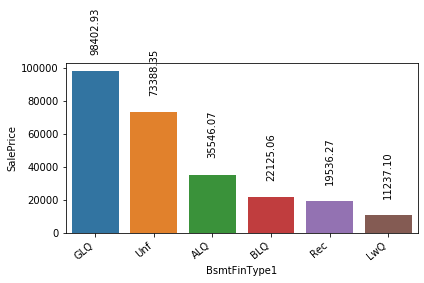


Maximum Sales : 
              SalePrice
BsmtFinType1           
GLQ           98402.935

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------BsmtFinType2  vs  SalePrice--------------------


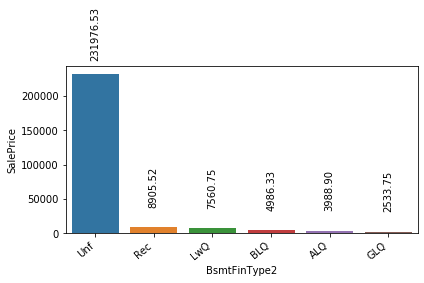


Maximum Sales : 
               SalePrice
BsmtFinType2            
Unf           231976.531

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------KitchenQual  vs  SalePrice--------------------


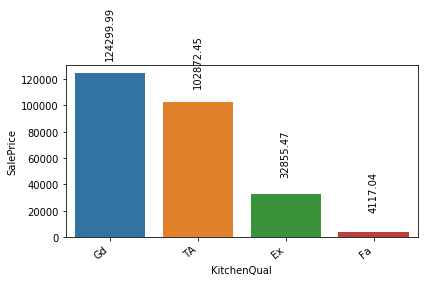


Maximum Sales : 
             SalePrice
KitchenQual           
Gd           124299.99

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------SaleType  vs  SalePrice--------------------


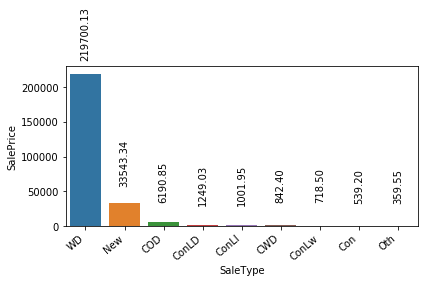


Maximum Sales : 
           SalePrice
SaleType            
WD        219700.127

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Exterior1st  vs  SalePrice--------------------


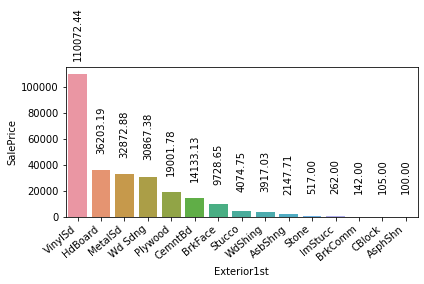


Maximum Sales : 
              SalePrice
Exterior1st            
VinylSd      110072.444

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Exterior2nd  vs  SalePrice--------------------


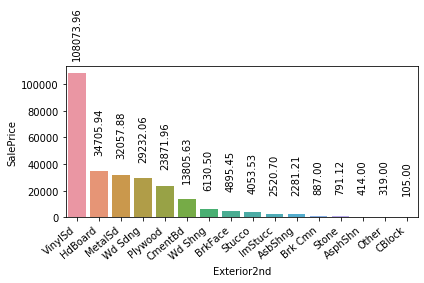


Maximum Sales : 
             SalePrice
Exterior2nd           
VinylSd      108073.96

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Utilities  vs  SalePrice--------------------


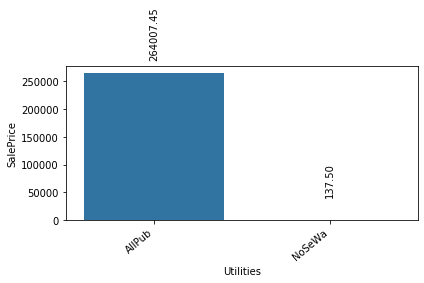


Maximum Sales : 
            SalePrice
Utilities            
AllPub     264007.446

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Electrical  vs  SalePrice--------------------


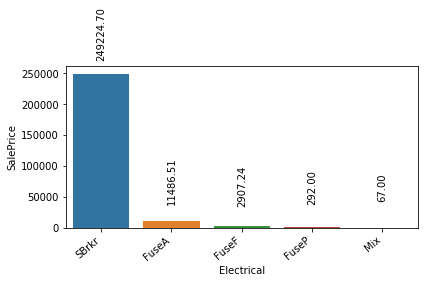


Maximum Sales : 
             SalePrice
Electrical            
SBrkr       249224.701

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------MSZoning  vs  SalePrice--------------------


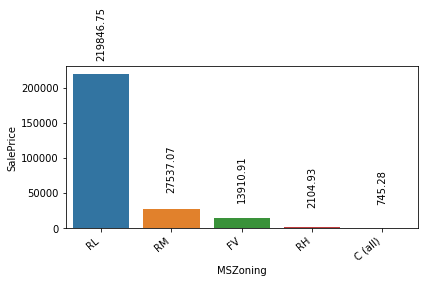


Maximum Sales : 
           SalePrice
MSZoning            
RL        219846.749

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Functional  vs  SalePrice--------------------


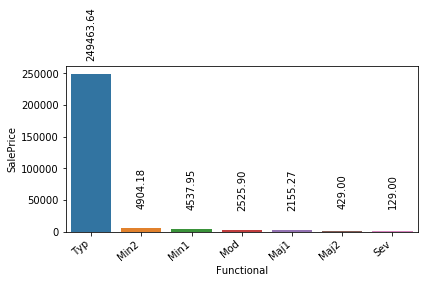


Maximum Sales : 
            SalePrice
Functional           
Typ         249463.64

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Alley  vs  SalePrice--------------------


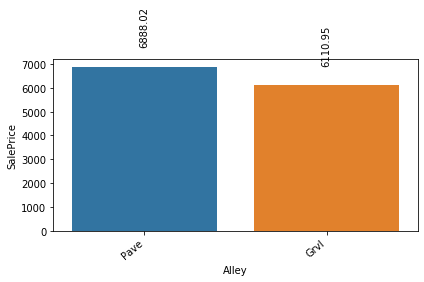


Maximum Sales : 
       SalePrice
Alley           
Pave    6888.024

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------MasVnrType  vs  SalePrice--------------------


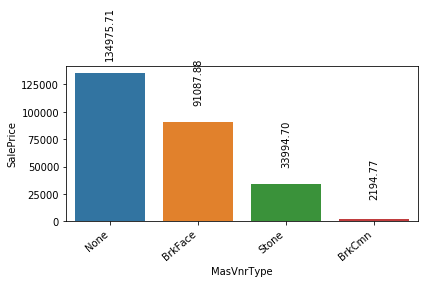


Maximum Sales : 
             SalePrice
MasVnrType            
None        134975.714

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------MiscFeature  vs  SalePrice--------------------


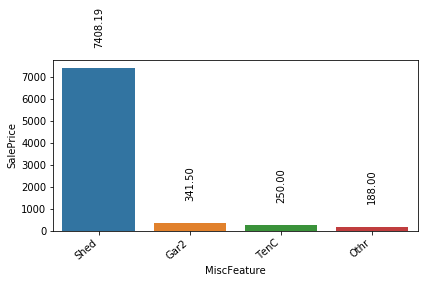


Maximum Sales : 
             SalePrice
MiscFeature           
Shed          7408.193

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------PoolQC  vs  SalePrice--------------------


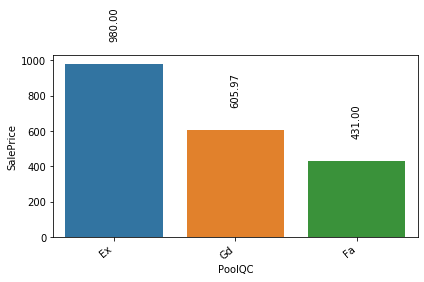


Maximum Sales : 
        SalePrice
PoolQC           
Ex          980.0

--------------------------------------------------
SalePrice in Thousands ('000)

--------------------Fence  vs  SalePrice--------------------


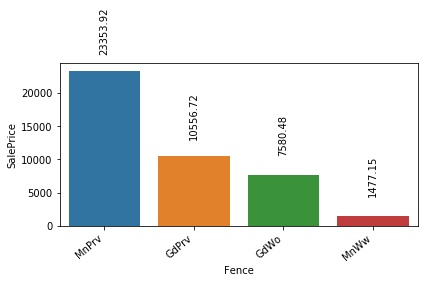


Maximum Sales : 
       SalePrice
Fence           
MnPrv  23353.921

--------------------------------------------------


In [179]:
##################### CATEGORY VS TRAGET VISUALISATIONS###################################### 
for cat in Grg:
    print("SalePrice in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  SalePrice' + "-"*20)
    output = final[[cat,'SalePrice']].groupby([cat]).apply(lambda x: x['SalePrice'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['SalePrice']
    ax = sns.barplot(output.index,'SalePrice', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)  
    
    
for cat in Bsmt:
    print("SalePrice in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  SalePrice' + "-"*20)
    output = final[[cat,'SalePrice']].groupby([cat]).apply(lambda x: x['SalePrice'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['SalePrice']
    ax = sns.barplot(output.index,'SalePrice', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)   
    
    
    
    
for cat in ts:
    print("SalePrice in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  SalePrice' + "-"*20)
    output = final[[cat,'SalePrice']].groupby([cat]).apply(lambda x: x['SalePrice'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['SalePrice']
    ax = sns.barplot(output.index,'SalePrice', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)        
    
    
for cat in ln:
    print("SalePrice in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  SalePrice' + "-"*20)
    output = final[[cat,'SalePrice']].groupby([cat]).apply(lambda x: x['SalePrice'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['SalePrice']
    ax = sns.barplot(output.index,'SalePrice', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)          
    
    
    
  ############ALL DATA ARE CLEANED NOW#####################  

In [186]:
########CHANGING DATA TYPE FOR SOME VARIABLES#######

dd=['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','BldgType','HouseStyle','Condition2','MSZoning',
'HeatingQC','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','Condition1','RoofMatl','Foundation', 
'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','Neighborhood','Exterior2nd','GarageType',
'Heating','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond','RoofStyle','Exterior1st', 
'MoSold','OverallQual','LandContour','Utilities','MiscFeature','SaleType','SaleCondition','MasVnrType','LotConfig','Electrical']


for i in dd:
    master[i]=master[i].astype(str)



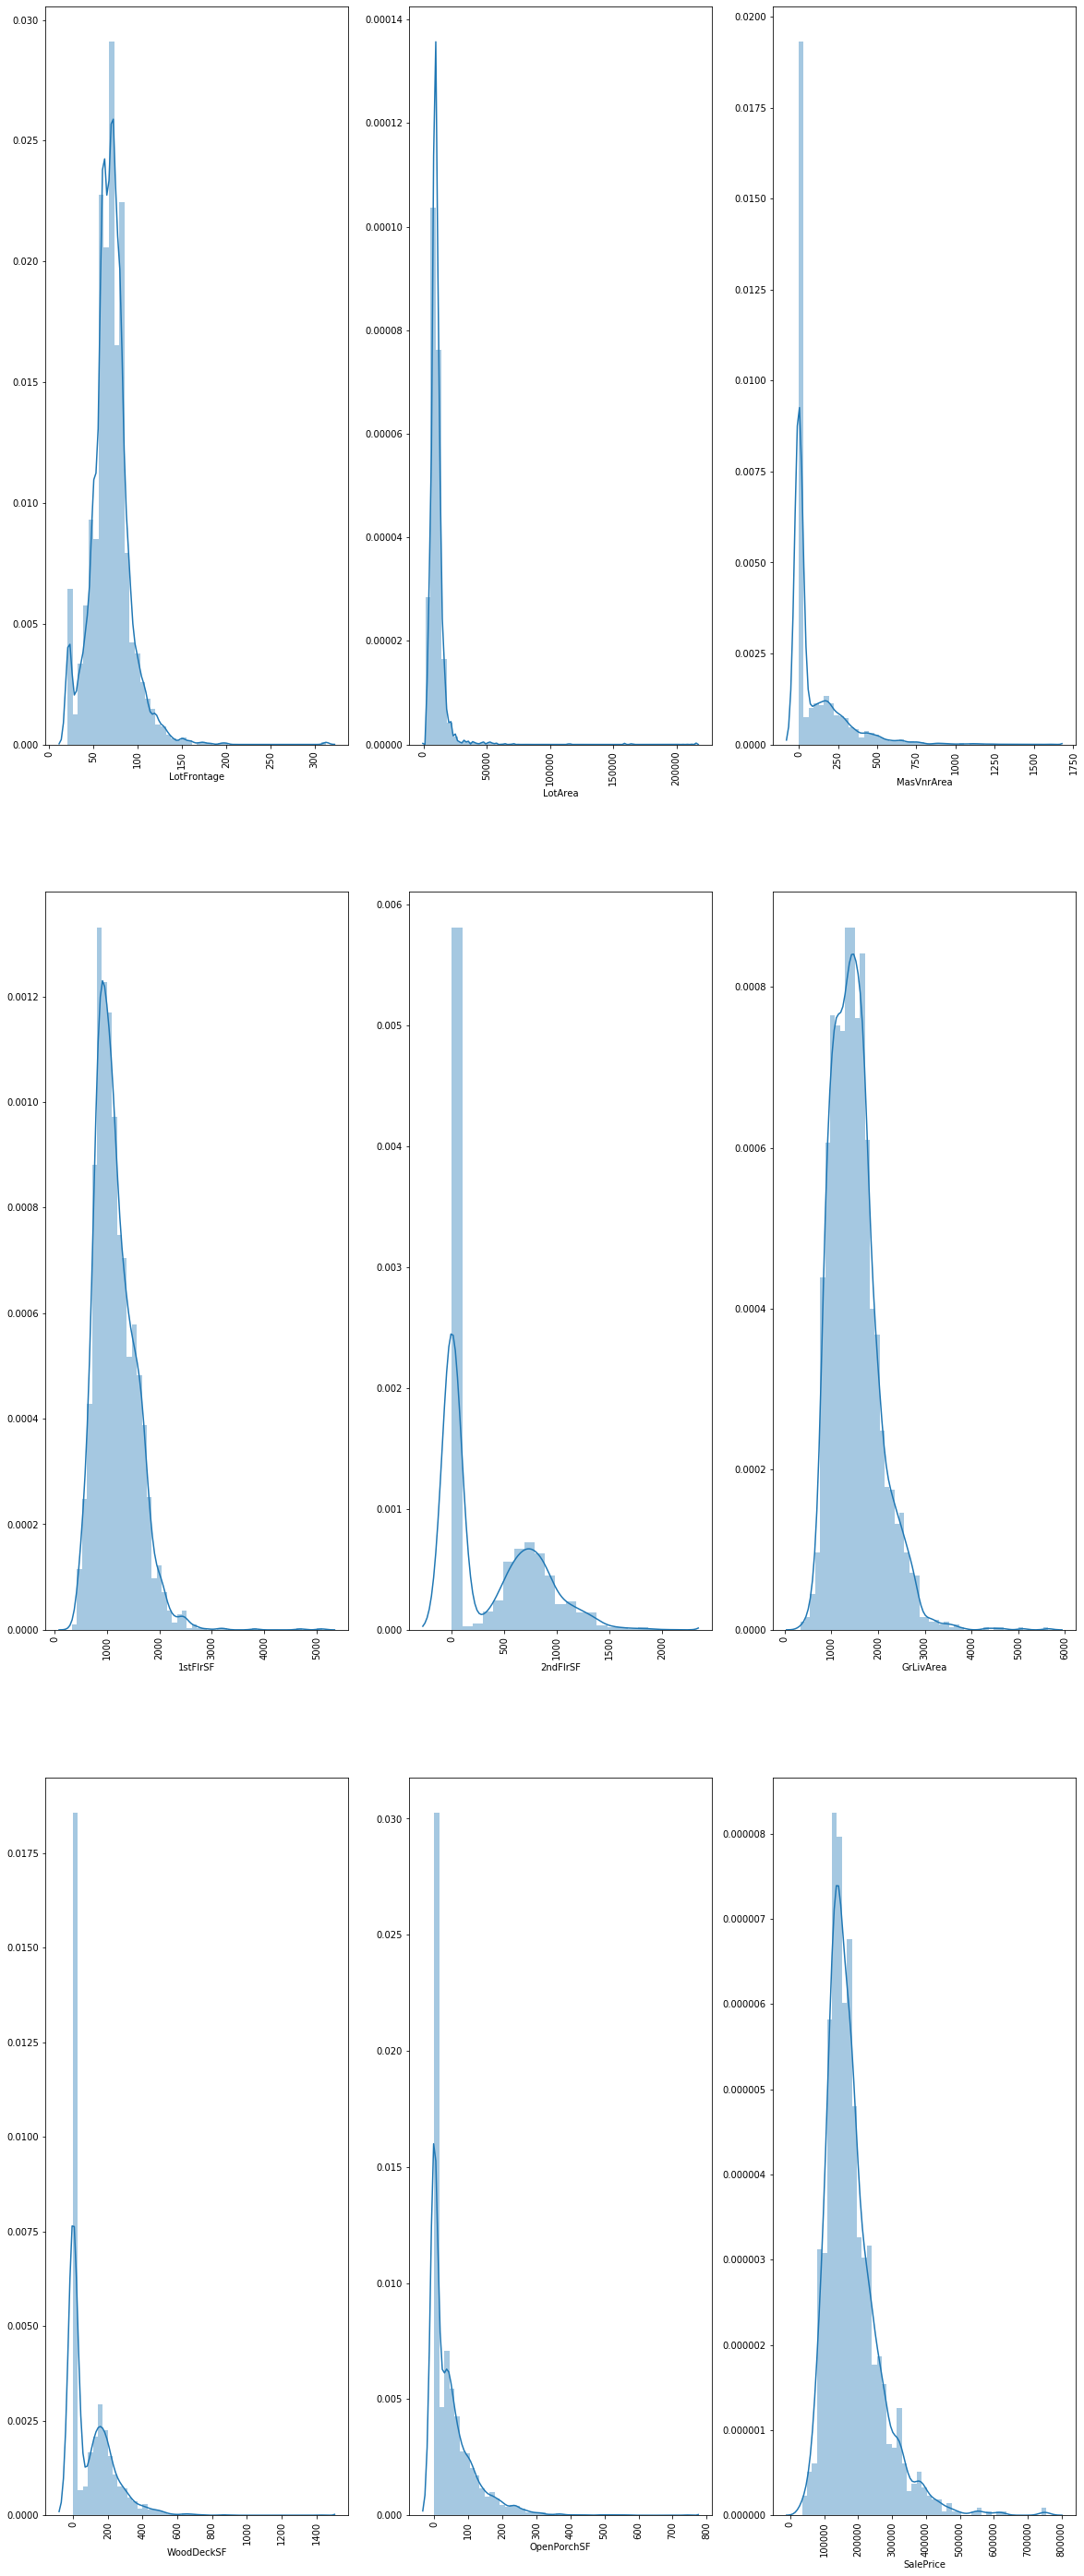

In [181]:
###DISTPLOT VISUALISATION  OF NUMERICAL VARIABLES#######

num=['LotFrontage', 'LotArea','MasVnrArea','1stFlrSF', '2ndFlrSF','GrLivArea','WoodDeckSF', 'OpenPorchSF',
         'SalePrice']


fig, ax=plt.subplots(3,3,figsize=(20,50))
for var,subplot in zip(num,ax.flatten()):
    sns.distplot(master[var],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

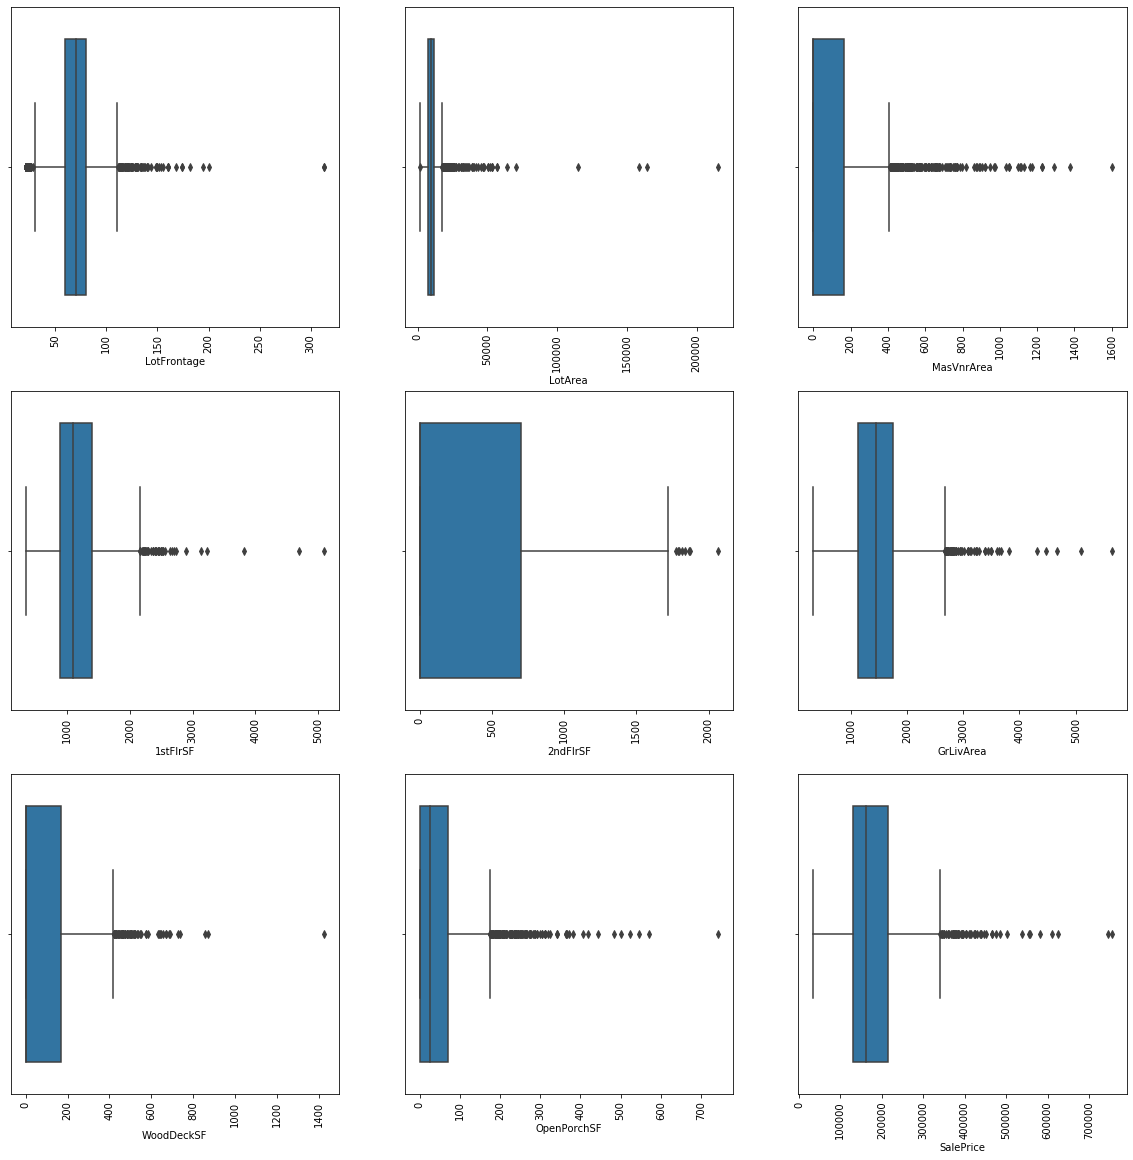

In [182]:
#####################BOXPLOT VISUALISATUONS###################

fig, ax=plt.subplots(3,3,figsize=(20,20))
for var,subplot in zip(num,ax.flatten()):
    sns.boxplot(master[var],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [183]:
################################FEATURE ENGINEERING######################################

master['Lot_Length']=master['LotArea'] / master['LotFrontage']
master['Life_Sold']=master['YrSold'] - master['YearBuilt']
master['Yr_Sin_Radd']=master['YrSold'] - master['YearRemodAdd']
master['Total_SF'] = master['TotalBsmtSF'] + master['1stFlrSF'] + master['2ndFlrSF']
master['Total_Area']=master['GarageArea'] + master['LotArea'] + master['GrLivArea'] + master['MasVnrArea'] + master['PoolArea']
master['Total_Sf_Outdoor']=master['WoodDeckSF'] + master['OpenPorchSF']

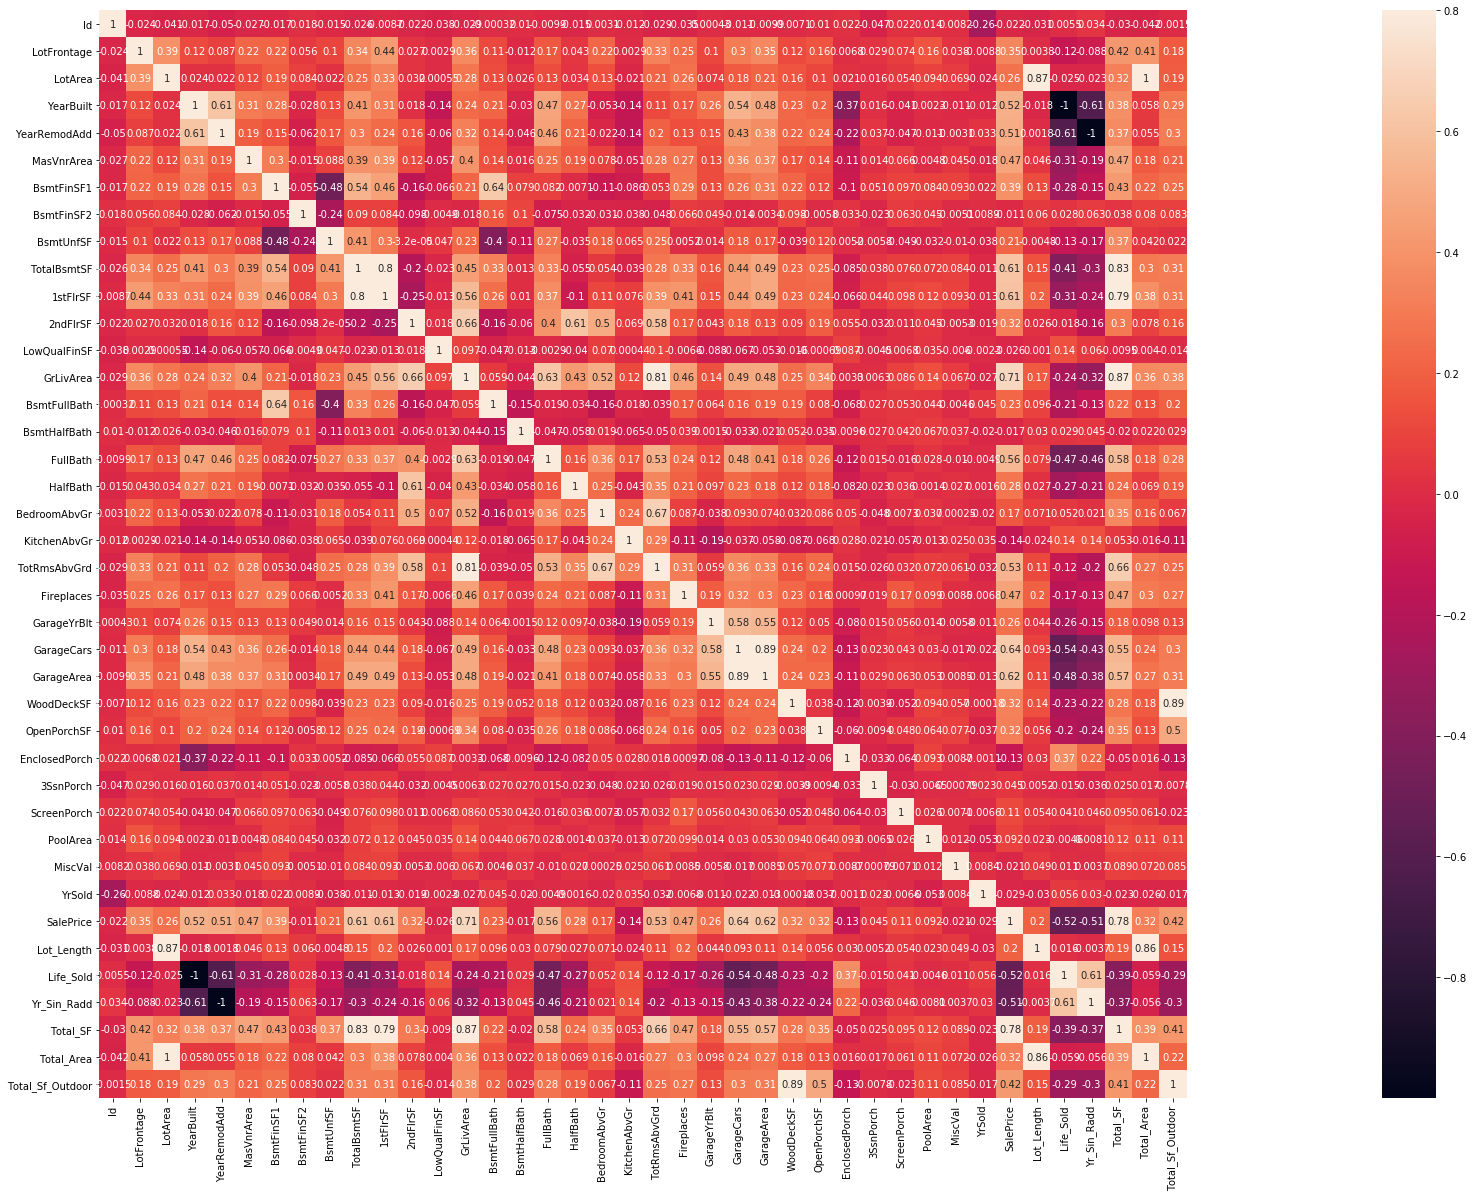

In [184]:
#####CORRELATION MATRIX######
#correlation matrix
corrmat = master.corr()
f, ax = plt.subplots(figsize=(70, 20))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

In [185]:
##LABEL ENCODING##
ds=['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','BldgType','HouseStyle','Condition2','MSZoning',
'HeatingQC','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','Condition1','RoofMatl','Foundation', 
'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','Neighborhood','Exterior2nd','GarageType',
'Heating','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond','RoofStyle','Exterior1st', 
'MoSold','OverallQual','LandContour','Utilities','MiscFeature','SaleType','SaleCondition','MasVnrType','LotConfig','Electrical']


le=LabelEncoder()
for i in ds:
    master[i]=le.fit_transform(master[i])
    
    
    
##TARGET VARIABLE TRANSFORMATION####
master["SalePrice"] = np.log1p(master["SalePrice"])

#COPY
masters=master.copy()

master['Id']=master['Id'].astype(str)

In [187]:
##############SKEWNESSS##################
from scipy import stats
from scipy.stats import norm, skew

numeric_feats = master.dtypes[master.dtypes != "object"].index 
#Check the skew of all numerical features
skewed_feats = master[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(50)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
Total_Area,11.913695
3SsnPorch,11.376065
Lot_Length,9.987245
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891


In [188]:
############TRANSFORMATION USING BOXCOX########

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    #master[feat] += 1
    master[i] = boxcox1p(master[i], lam)

There are 39 skewed numerical features to Box Cox transform


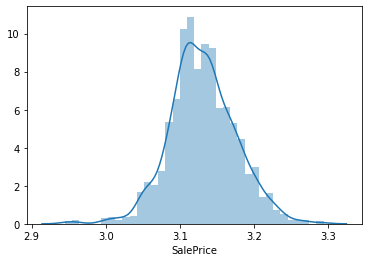

In [831]:
#CHECK TARGET VARIABLE AFTER TRANSFORMATION
sns.distplot(master.SalePrice)

In [189]:
#####MODEL BUILDINGS###

master= pd.get_dummies(master, columns=ds)
master.head()

X = master[master['SalePrice'].isnull()!=True].drop(['Id','SalePrice'], axis=1)
y = master[master['SalePrice'].isnull()!=True]['SalePrice']

X_test = master[master['SalePrice'].isnull()==True].drop(['Id','SalePrice'], axis=1)

X.shape, y.shape, X_test.shape


((1460, 364), (1460,), (1459, 364))

In [190]:
########SPLITTING#####
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [196]:
##########RIDGE REGRESSION##########

list1=[0.0018,0.002,0.005,0.08,0.09,0.1,0.5]
list2=[]
for i in list1:
    ridge_reg = Ridge(alpha=i,normalize=True)
    ridge_reg.fit(x_train,y_train)
    y_pred_r=ridge_reg.predict(x_val)
    r2score_r= r2_score(y_val,y_pred_r)
    list2.append(r2score_r)

ridge_rscore_df=pd.DataFrame({"ALPHA":list1,"R2SCORE":list2})
ridge_rscore_df 

,ALPHA,R2SCORE
0,0.0018,0.871979
1,0.0020,0.872226
2,0.0050,0.875087
3,0.0800,0.891646
4,0.0900,0.892707
5,0.1000,0.893675
6,0.5000,0.904649


In [948]:
#####LINEAR REGRESSION###
logmodel = LinearRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_val)

model_score = logmodel.score(x_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
# Accuracy Score
acc_log = round(logmodel.score(x_train, y_train) * 100, 2)
print('Acc: ',acc_log)

R2 sq:  0.9534313866354768
Acc:  95.34


In [949]:
### GBM###
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_train, y_train)


from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)

# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(x_val)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, y_predicted))
# Accuracy Score
acc_log = round(model.score(x_train, y_train) * 100, 2)
print('Acc: ',acc_log)

R2 sq:  0.9618790658658234
Mean squared error: 0.00
Test Variance score: 0.88
Acc:  96.19


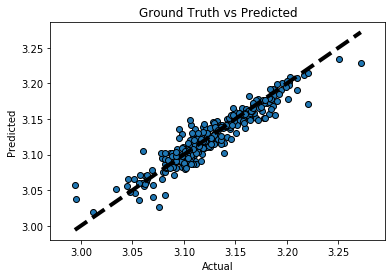

In [950]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [964]:
#Print Feature Importance:
#######GBM IMPORTANCES####
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Total_SF,0.603
GrLivArea,0.036
GarageCars,0.029
Life_Sold,0.028
Yr_Sin_Radd,0.027
ExterQual_3,0.022
KitchenQual_4,0.016
YearRemodAdd,0.016
Total_Area,0.016
